In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd() / "_scripts"))

In [3]:

import polars as pl
import seaborn.objects as so

In [4]:


# sns.set_style("darkgrid")

from plan2eplus.helpers.variable_interfaces import all_variables as vars
from plan2eplus.studies.analysis2.all_cases_v_time import create_space_and_site_dfs
from plan2eplus.studies.experiments.name_splits import (
    split_by_case_type,
    split_by_doors,
)
from plan2eplus.studies.experiments.retrieve import (
    retrieve_comparison_groups,
)
from plan2eplus.studies.experiments.scatter import (
    create_comparison_df,
    create_plots_for_comparison_group,
)
from plan2eplus.studies.setup.data_wrangle2 import (
    create_wide_dataframe_for_many_qois_and_cases,
)



In [5]:
vals = create_plots_for_comparison_group("doors")
vals 

In [6]:
create_comparison_df.cache_info()

CacheInfo(hits=0, misses=1, maxsize=128, currsize=1)

In [7]:
# save_plots_for_all_experiments()

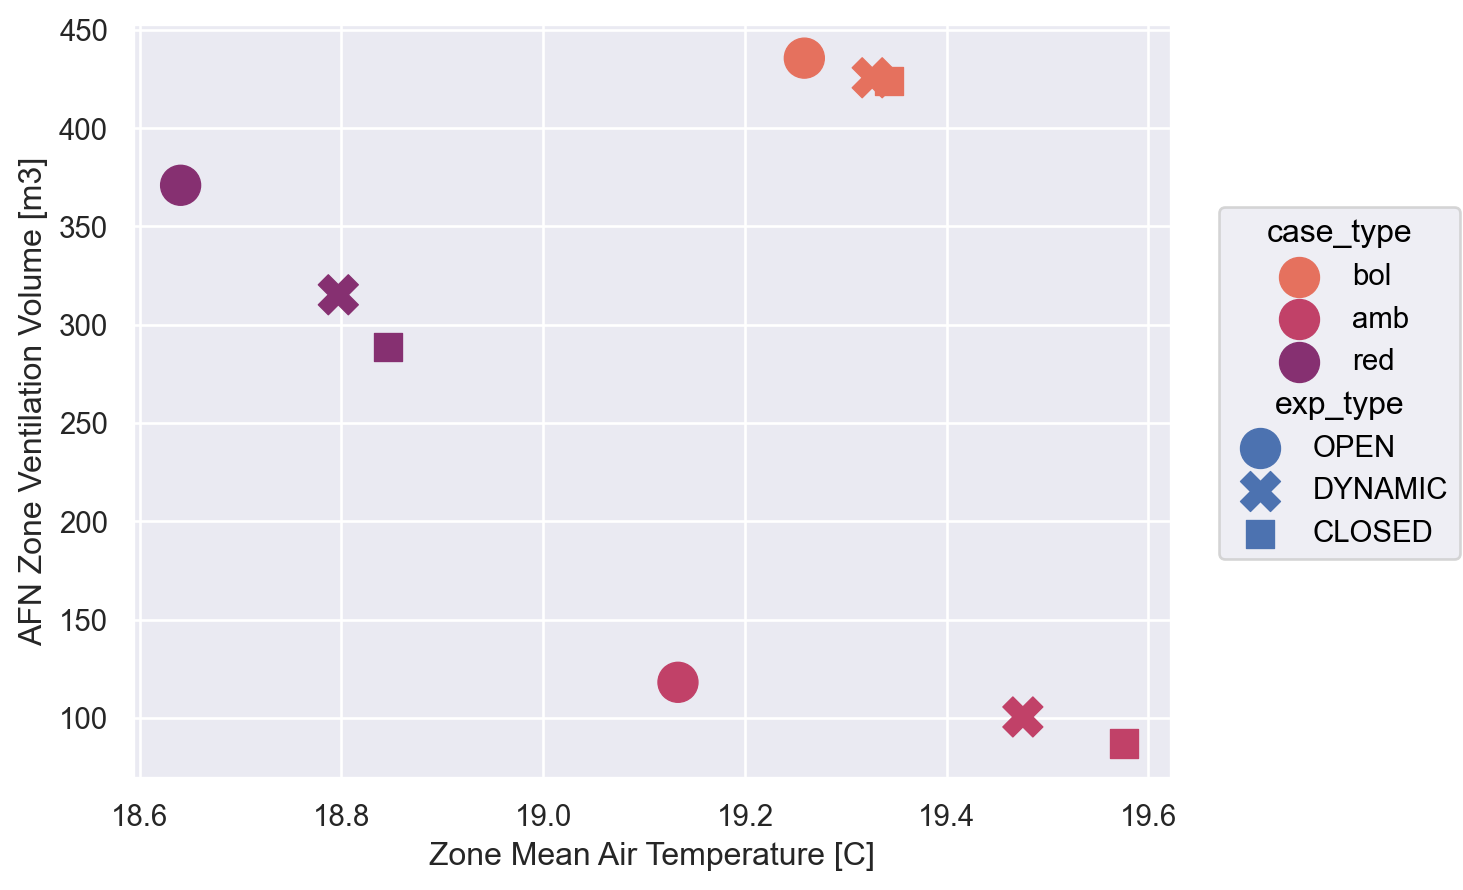

In [8]:
vals[0]

In [9]:
# save_plots_for_all_experiments()

## s

In [10]:
cases = retrieve_comparison_groups("doors")
cases

# get_experiment_folders()

[CaseData(case_name='bol_5_CLOSED', idf=<geomeppy.idf.IDF object at 0x15b6ece90>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/plan2eplus/cases/241119_doors/bol_5_CLOSED/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_bol_5'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/plan2eplus/cases/241119_doors/bol_5_CLOSED')),
 CaseData(case_name='amb_b1_DYNAMIC', idf=<geomeppy.idf.IDF object at 0x15ced87d0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/plan2eplus/cases/241119_doors/amb_b1_DYNAMIC/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_amb_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/plan2eplus/cases/241119_doors/amb_b1_DYNAMIC')),
 CaseData(case_name='red_b1_DYNAMIC', idf=<geomeppy.idf.IDF object at 0x15bf05b20>, sql=Energy SQLiteResult

In [11]:
df_temp = create_wide_dataframe_for_many_qois_and_cases(cases, [vars.zone.temp["zone_mean_air_temp"]])

df, df_site = create_space_and_site_dfs(cases=cases, space_qois=[vars.afn.zone["vent_vol"], vars.afn.zone["mix_vol"]], site_qois=[vars.site.wind["speed"]])

In [12]:
df_vol = df.join(df_temp, on=["case_names", "space_names", "datetimes"]).with_columns(combined_vent =pl.col("AFN Zone Ventilation Volume [m3]") + pl.col("AFN Zone Mixing Volume [m3]"))
df_vol.head()

case_names,space_names,datetimes,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],time,Zone Mean Air Temperature [C],combined_vent
str,str,datetime[μs],f64,f64,str,f64,f64
"""bol_5_CLOSED""","""BLOCK 00 STOREY 0""",2017-07-01 00:00:00,240.133294,0.0,"""00:00""",19.624067,240.133294
"""bol_5_CLOSED""","""BLOCK 00 STOREY 0""",2017-07-01 00:15:00,281.920251,0.0,"""00:15""",18.62186,281.920251
"""bol_5_CLOSED""","""BLOCK 00 STOREY 0""",2017-07-01 00:30:00,308.423544,0.0,"""00:30""",17.635697,308.423544
"""bol_5_CLOSED""","""BLOCK 00 STOREY 0""",2017-07-01 00:45:00,324.762766,0.0,"""00:45""",16.662282,324.762766
"""bol_5_CLOSED""","""BLOCK 00 STOREY 0""",2017-07-01 01:00:00,309.539315,0.0,"""01:00""",16.507866,309.539315


In [13]:
len(df_vol)

8064

In [14]:
df_agg = df_vol.group_by("case_names").agg([pl.mean("AFN Zone Ventilation Volume [m3]"),
pl.mean("AFN Zone Mixing Volume [m3]"),
pl.mean("combined_vent"), 
pl.mean("Zone Mean Air Temperature [C]")
])


In [15]:
df_agg = split_by_doors(split_by_case_type(df_agg))
df_agg

case_names,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],combined_vent,Zone Mean Air Temperature [C],case_type,exp_type
str,f64,f64,f64,f64,str,str
"""red_b1_CLOSED""",232.640805,146.860422,379.501227,22.327406,"""red""","""CLOSED"""
"""bol_5_CLOSED""",317.663785,92.129051,409.792836,23.154855,"""bol""","""CLOSED"""
"""amb_b1_CLOSED""",70.374518,208.903753,279.278271,23.553939,"""amb""","""CLOSED"""
"""bol_5_Medium""",340.079384,250.772877,590.852261,23.040847,"""bol""","""OPEN"""
"""red_b1_Medium""",299.684163,405.075236,704.759398,22.126302,"""red""","""OPEN"""
"""amb_b1_Medium""",91.36269,353.926941,445.28963,23.111333,"""amb""","""OPEN"""
"""bol_5_DYNAMIC""",326.89749,144.66714,471.564629,23.126356,"""bol""","""DYNAMIC"""
"""red_b1_DYNAMIC""",262.983758,253.302264,516.286022,22.288867,"""red""","""DYNAMIC"""
"""amb_b1_DYNAMIC""",85.99218,291.524465,377.516645,23.418397,"""amb""","""DYNAMIC"""


In [16]:
import altair as alt
from vega_datasets import data

In [26]:
df_agg

case_names,AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],combined_vent,Zone Mean Air Temperature [C],case_type,exp_type
str,f64,f64,f64,f64,str,str
"""red_b1_CLOSED""",232.640805,146.860422,379.501227,22.327406,"""red""","""CLOSED"""
"""bol_5_CLOSED""",317.663785,92.129051,409.792836,23.154855,"""bol""","""CLOSED"""
"""amb_b1_CLOSED""",70.374518,208.903753,279.278271,23.553939,"""amb""","""CLOSED"""
"""bol_5_Medium""",340.079384,250.772877,590.852261,23.040847,"""bol""","""OPEN"""
"""red_b1_Medium""",299.684163,405.075236,704.759398,22.126302,"""red""","""OPEN"""
"""amb_b1_Medium""",91.36269,353.926941,445.28963,23.111333,"""amb""","""OPEN"""
"""bol_5_DYNAMIC""",326.89749,144.66714,471.564629,23.126356,"""bol""","""DYNAMIC"""
"""red_b1_DYNAMIC""",262.983758,253.302264,516.286022,22.288867,"""red""","""DYNAMIC"""
"""amb_b1_DYNAMIC""",85.99218,291.524465,377.516645,23.418397,"""amb""","""DYNAMIC"""


In [30]:
df_agg["AFN Zone Ventilation Volume [m3]"]

AFN Zone Ventilation Volume [m3]
f64
232.640805
317.663785
70.374518
340.079384
299.684163
91.36269
326.89749
262.983758
85.99218


In [40]:
alt.Chart(df_agg).mark_point().encode(
    x=alt.X("case_type:N"),
    y=alt.Y(alt.repeat("column"), type='quantitative'),
    color="exp_type"
).properties(
    width=100,
    height=200
).repeat(
    column=[r"AFN Zone Ventilation Volume \[m3\]", 
            r"AFN Zone Mixing Volume \[m3\]", 
            r"Zone Mean Air Temperature \[C\]"]
)

alt.RepeatChart(...)

In [31]:
vent = alt.Chart(df_agg).mark_point().encode(
    x=alt.X("case_type:N"),
    y=alt.Y(r"AFN Zone Ventilation Volume \[m3\]:Q"),
    color="exp_type"
)

alt.Chart(...)

In [33]:
source

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [34]:
source = data.seattle_weather()

alt.Chart(source).mark_bar().encode(
    alt.X("weather:N").title("Date"),
    alt.Y("mean(precipitation):Q"),
)

alt.Chart(...)

alt.Chart(...)

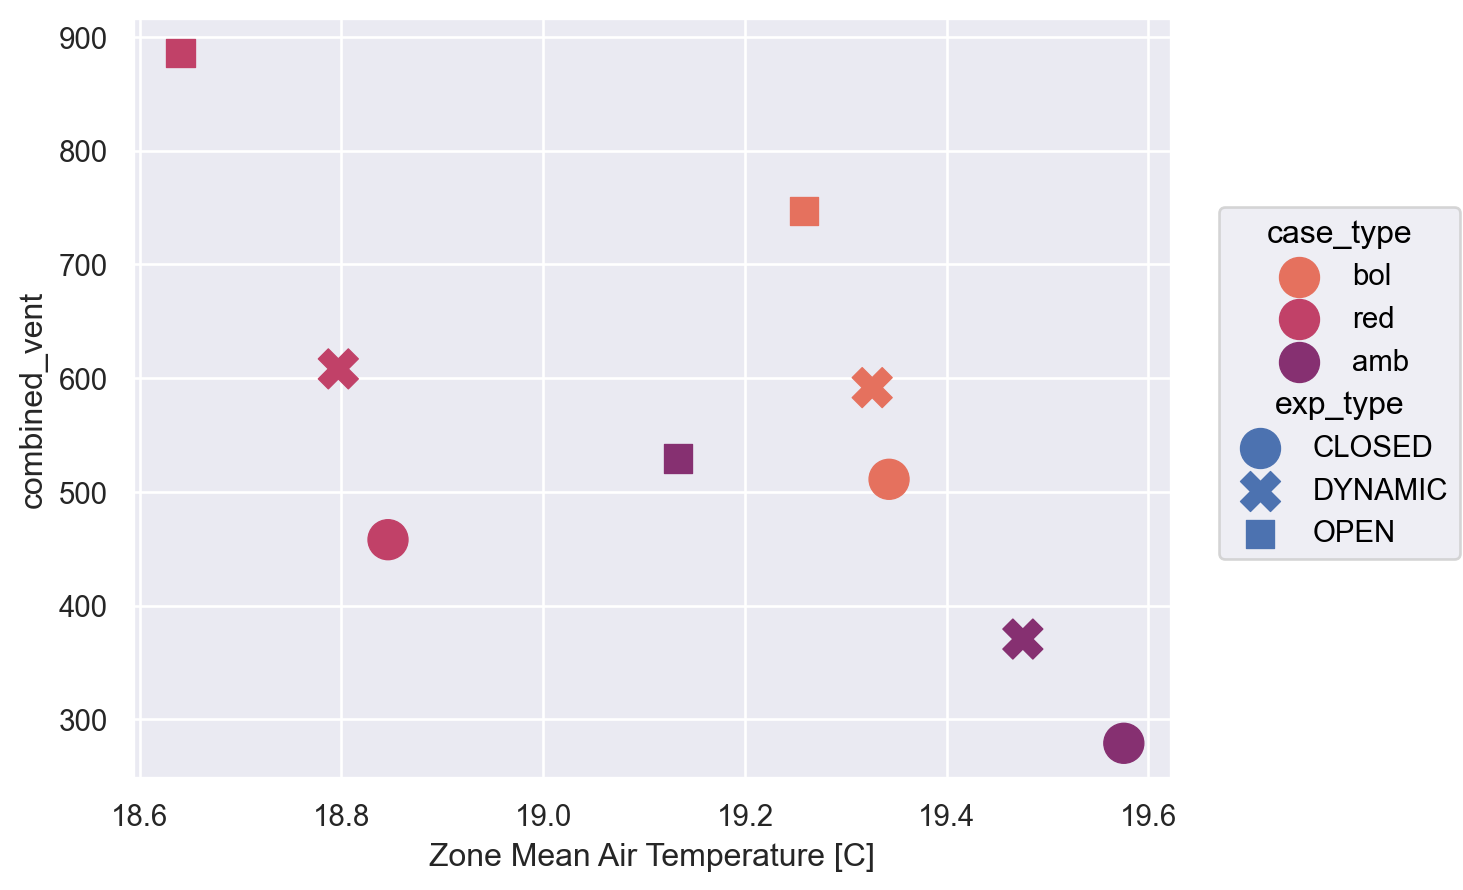

In [31]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="combined_vent", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())
  

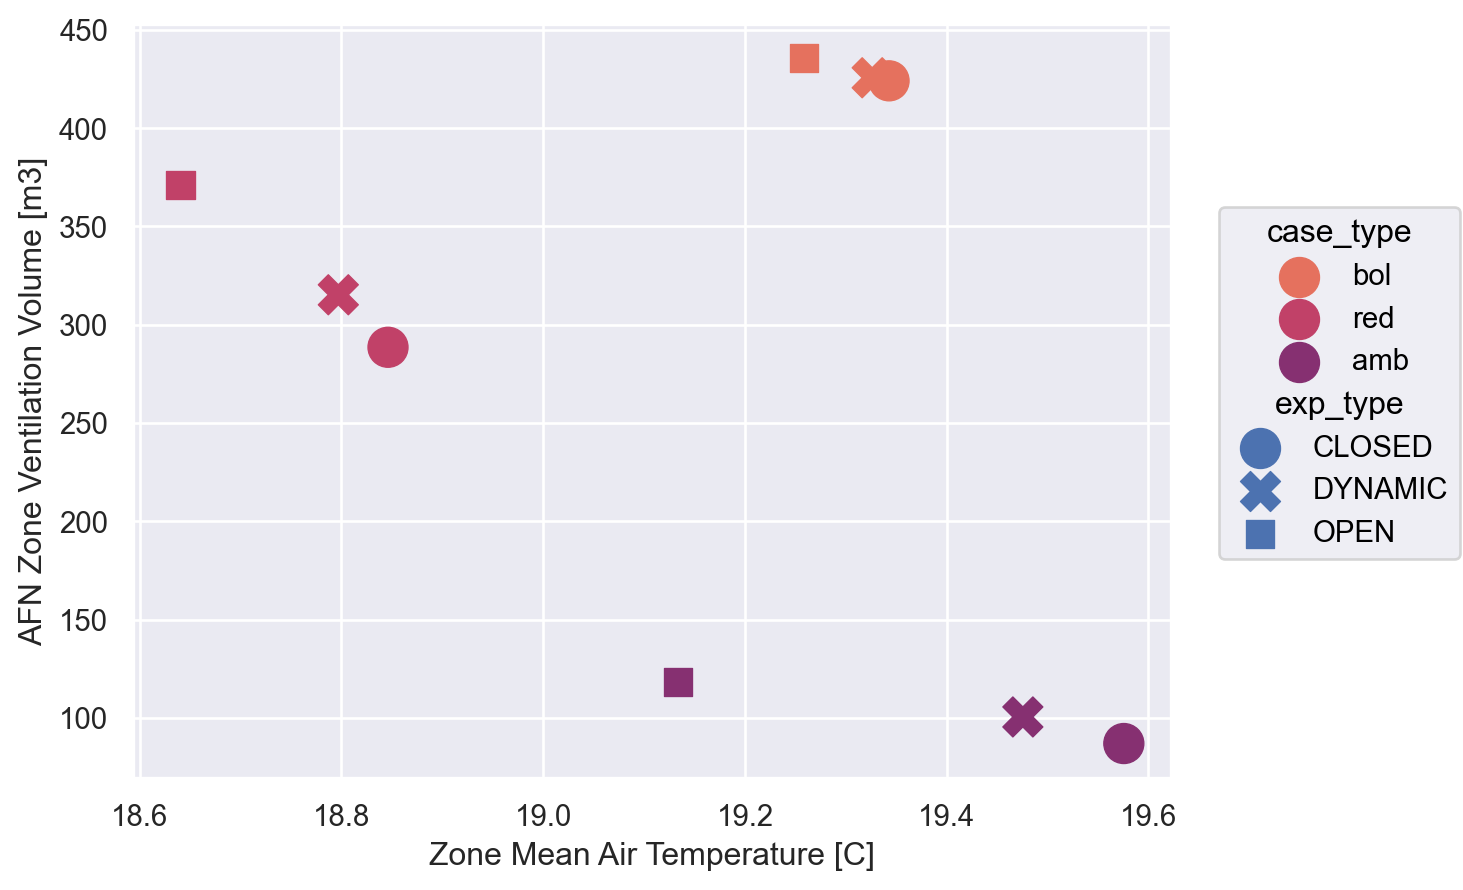

In [32]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="AFN Zone Ventilation Volume [m3]", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())

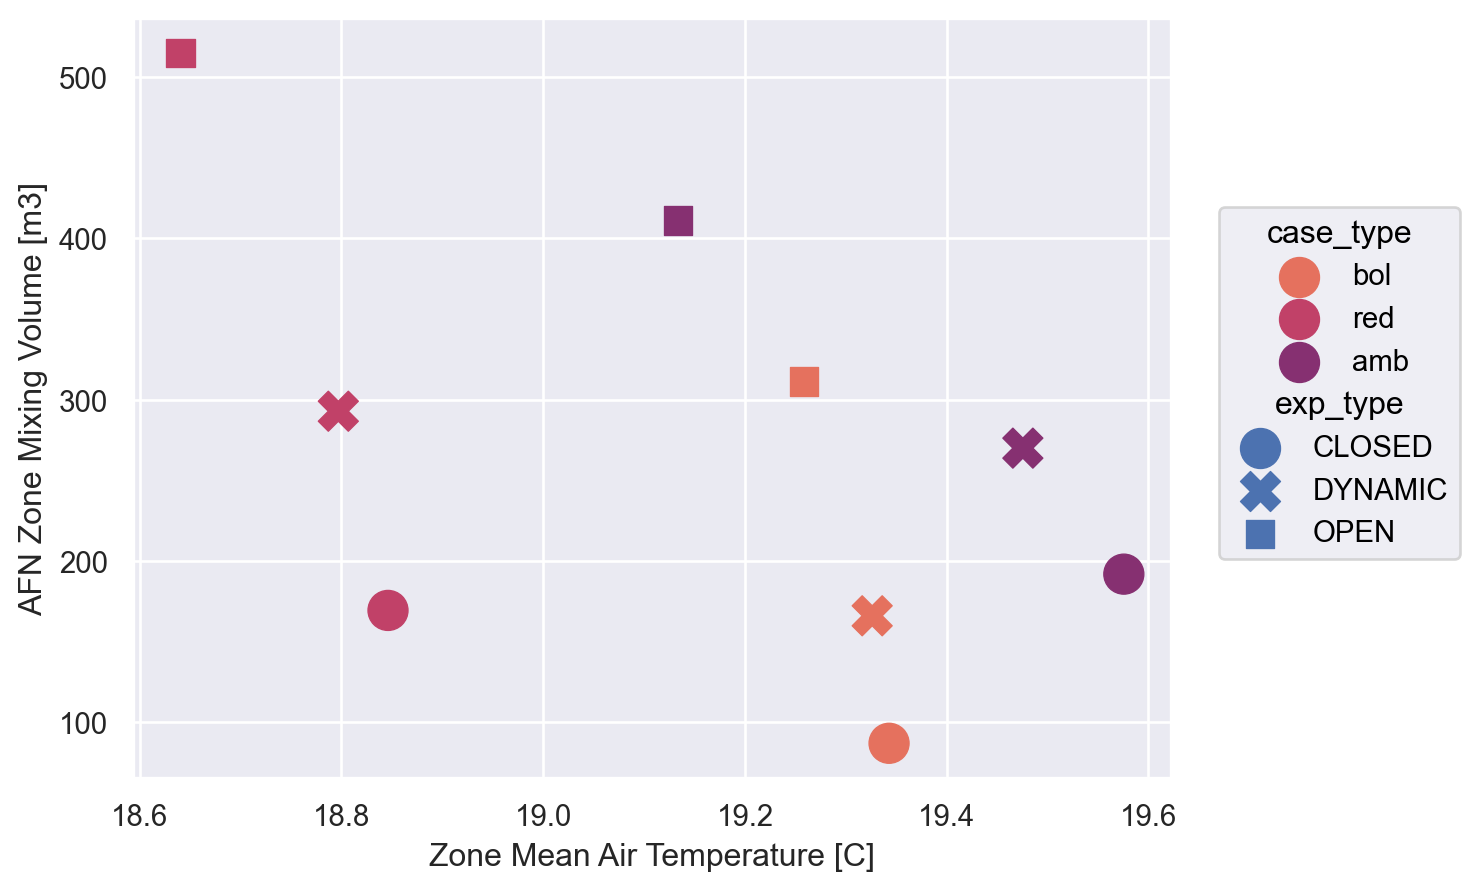

In [33]:
(so.Plot(df_agg, x="Zone Mean Air Temperature [C]", y="AFN Zone Mixing Volume [m3]", color="case_type", marker="exp_type" ).add(so.Dot(pointsize=15)).scale(color="flare").plot())